# First Step Analysis

In [1]:
# Import required functions and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
from matplotlib.pyplot import figure
from collections import defaultdict

First, we define functions that will calculate transition probabilities for a given state.

In [2]:
def new_str(x):
    
    # This function accepts an integer value x and returns 
    # string '0x' if x is a single character or 'x' if x is greater than one character
    # i.e., 1 -> '01'  and   10 -> '10'
    
    if len(str(x)) == 1 :
        return '0' + str(x)
    else: return str(x)
    

def get_probs(state):
    
    # This function accepts a starting state as a string in the form 'AxxByy' (or 'END')
    # where xx is the number of coins in player A's posession, and yy is B's.
    # It returns a dictionary where the keys are states the initial state 
    # could possibly transition to, and the values are transition probabilities.
    
    # Initialize the dictionary to be returned
    probs = defaultdict(float)
    
    # Define the 'END' state to only transition to itself with probability 1
    if state == 'END':
        probs[state] = 1
        return probs
    
    # Select the integer values of coins in each player's possession
    a = int(state[1:3])
    b = int(state[4:6])
    
    # Calculate the number of coins in the pot
    pot = 10 - a - b
     
    # Iterate through all potential die rolls by player A
    for i in [1,2,3,4,5,6]:
        
        # This if-elif-else statement calculates potential new coin values
        # for player A and the pot for each die roll 1 through 6
        
        # A rolls 1
        if i == 1:
            new_a = new_str(a)
            new_pot = pot
            
        # A rolls 2
        elif i == 2:
            new_a = new_str(a + pot)
            new_pot = 0
            
        # A rolls 3
        elif i == 3:
            new_a = new_str(a + (pot // 2))
            new_pot = pot - (pot // 2)
            
        # A rolls 4, 5, or 6
        else:
            
            # If A doesn't have any coins, update the transition 
            # probabilities for 'END' depending on B's number of coins
            if (a == 0 and b != 0):
                probs['END'] += 1/6 # this will sum to 0.5 for rolls 4,5,6
                continue                
            elif (a == 0 and b == 0):
                probs['END'] += 1/4 # this will sum to 0.75 (1 - P(A=0 OR B=0)) for rolls 4,5,6
                continue       
            else:
                new_a = new_str(a - 1)
                new_pot = pot + 1
                
        
        # The following statements calculate potential new coin values
        # for player B for each die roll 1 through 6 and update the transition
        # probabilities for the derived states
        
        # B rolls 1    
        new_b = new_str(b)       
        probs['A' + new_a + 'B' + new_b] += 1/36

        #B rolls 2
        new_b = new_str(b + new_pot)
        probs['A' + new_a + 'B' + new_b] += 1/36

        #B rolls 3
        new_b = new_str(b + (new_pot // 2))
        probs['A' + new_a + 'B' + new_b] += 1/36

        # B rolls 4,5,6
        if a != 0 and b == 0:      # Only when a != 0 since the 'END' transition
            probs['END'] += 1/12   # probabilities when a == 0 were updated previously
        else:
            new_b = new_str(b - 1)
            probs['A' + new_a + 'B' + new_b] += 1/12
            
    return probs

Now we calculate a list of all possible states.

In [3]:
# Start with the 'END' state
states = ['END']
        
# This procedure iterates through all potential combinations of coin values from 1 to 10
# and adds the state to the list if a + b <= 10

for a in range(0, 11):
    for b in range(0, 11):
        if (a + b) <= 10:
            states.append('A' + new_str(a) + 'B' + new_str(b))
    

In [4]:
print(states)

['END', 'A00B00', 'A00B01', 'A00B02', 'A00B03', 'A00B04', 'A00B05', 'A00B06', 'A00B07', 'A00B08', 'A00B09', 'A00B10', 'A01B00', 'A01B01', 'A01B02', 'A01B03', 'A01B04', 'A01B05', 'A01B06', 'A01B07', 'A01B08', 'A01B09', 'A02B00', 'A02B01', 'A02B02', 'A02B03', 'A02B04', 'A02B05', 'A02B06', 'A02B07', 'A02B08', 'A03B00', 'A03B01', 'A03B02', 'A03B03', 'A03B04', 'A03B05', 'A03B06', 'A03B07', 'A04B00', 'A04B01', 'A04B02', 'A04B03', 'A04B04', 'A04B05', 'A04B06', 'A05B00', 'A05B01', 'A05B02', 'A05B03', 'A05B04', 'A05B05', 'A06B00', 'A06B01', 'A06B02', 'A06B03', 'A06B04', 'A07B00', 'A07B01', 'A07B02', 'A07B03', 'A08B00', 'A08B01', 'A08B02', 'A09B00', 'A09B01', 'A10B00']


We create a dictionary where the keys are each state as a potential starting state and the values are dictionaries of transition probabilities output by the get_probs function.

In [5]:
state_probs = defaultdict(defaultdict)

for state in states:
    state_probs[state] = get_probs(state)

We create the transition probability matrix P.

In [6]:
P = []

# Iterate though all the states (the FROM axis of the transition matrix)
for state_from in states:
    
    #Get the transition probability dictionary for the FROM state
    probs = state_probs[state_from]
    inner = [] # Initialize an empty ROW of the transition matrix
    
    # Iterate through all the states (the TO axis of the transition matrix)
    for state_to in states: 
        
        # Append the probability if the TO state is in the FROM state's transition dictionary
        if state_to in probs.keys():
            inner.append(probs[state_to])
            
        # If not, append 0
        else:
            inner.append(0)
            
    # Add the row to the matrix
    P.append(inner) 
    
# Convert the list of lists to a 2D NumPy array
P = np.array(P)

Now we can display the transition probability matrix.

Text(0, 0.5, 'Transition FROM')

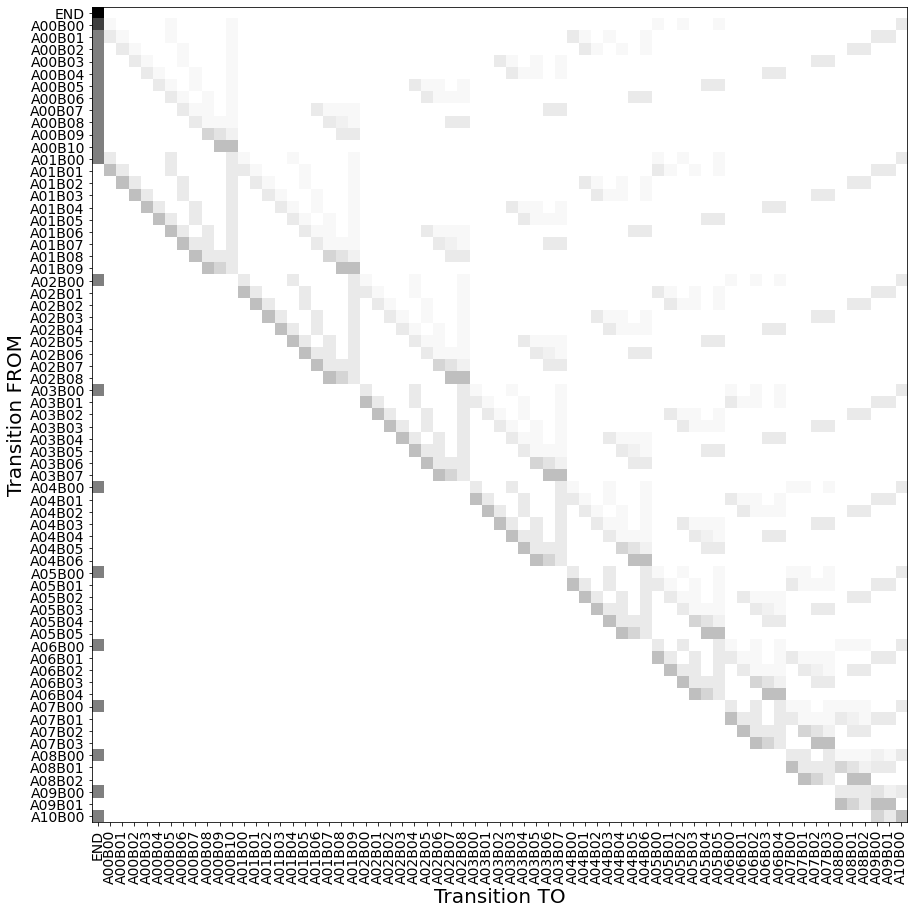

In [7]:
figure(figsize=(15,15))

x = np.arange(0, P.shape[0])
plt.imshow(P, cmap='gray_r')
plt.xticks(x, states, rotation='vertical', fontsize=14)
plt.yticks(x, states, rotation='horizontal', fontsize=14)
plt.xlabel('Transition TO', fontsize=20)
plt.ylabel('Transition FROM', fontsize=20)

# Option to save the output as an image
#plt.savefig('P.png')

In [8]:
# Option to output the matrix to a .csv

# df = pd.DataFrame(P, index = states, columns = states)
# df.to_csv('state_transition_matrix.csv')

We partition P into matrices Q and R, then calculate the Fundamental Matrix N from Q. We calculate the vector t of expected cycle lengths using N.

In [9]:
# Number of absorbing and transient states
num_abs = 1
num_trans = P.shape[0] - num_abs

# Select the absorbing and transient states
abs_states = states[:num_abs]
trans_states = states[num_abs:]

# Partition P

Q = P[num_abs:,num_abs:]
R = P[num_abs:,:num_abs]

# Calculate the fundamental matrix
I = np.eye(num_trans)
N = np.linalg.inv(I - Q)

# Calculate the vector of expected cycle lengths
ones = np.ones((num_trans, 1))
t = N @ ones

Below, we display Q as an image.

Text(0, 0.5, 'Transition FROM')

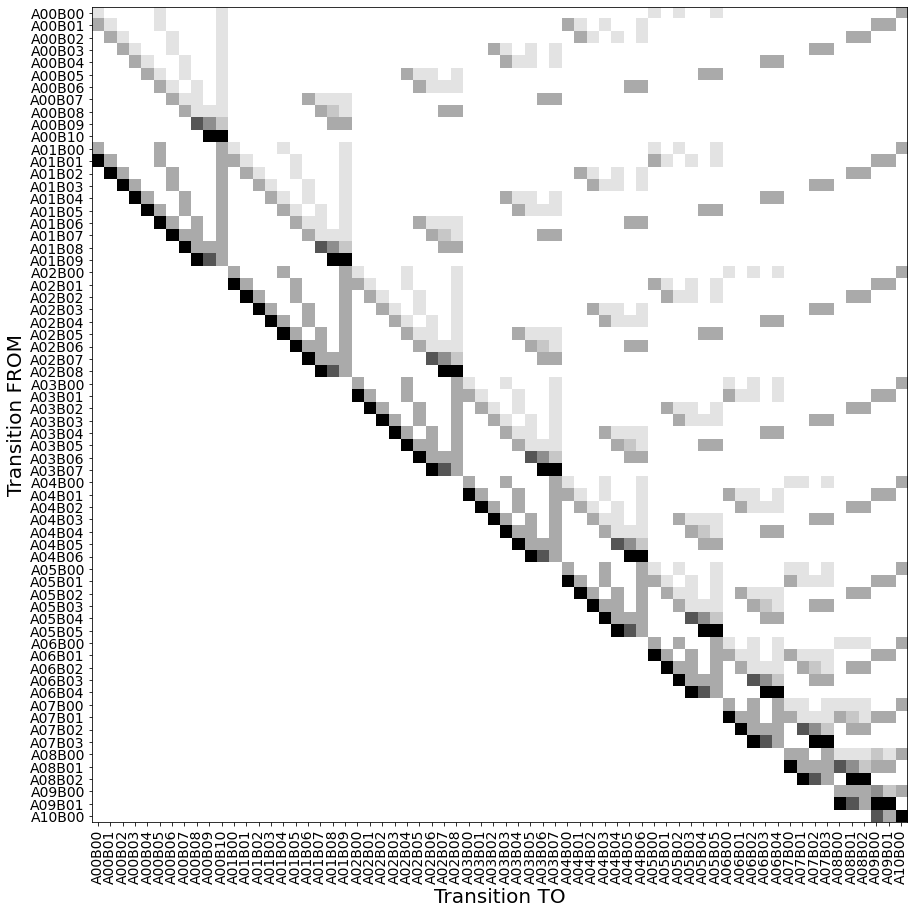

In [10]:
figure(figsize=(15,15))

x = np.arange(0, Q.shape[0])
plt.imshow(Q, cmap='gray_r')
plt.xticks(x, states[num_abs:], rotation='vertical', fontsize=14)
plt.yticks(x, states[num_abs:], rotation='horizontal', fontsize=14)
plt.xlabel('Transition TO', fontsize=20)
plt.ylabel('Transition FROM', fontsize=20)

# Option to save the output as an image
#plt.savefig('Q.png')

Similarly, we display R as an image.

Text(0, 0.5, 'Transition FROM')

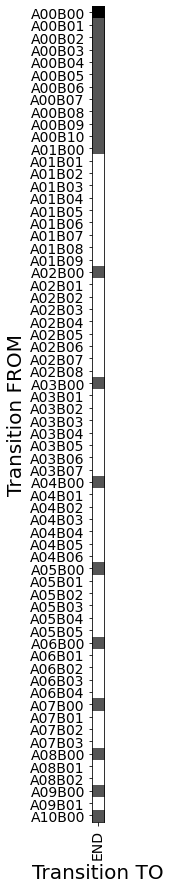

In [11]:
figure(figsize=(15,15))

x = np.arange(0, R.shape[1])
y = np.arange(0, R.shape[0])
plt.imshow(R, cmap='gray_r')
plt.xticks(x, states[:num_abs], rotation='vertical', fontsize=14)
plt.yticks(y, states[num_abs:], rotation='horizontal', fontsize=14)
plt.xlabel('Transition TO', fontsize=20)
plt.ylabel('Transition FROM', fontsize=20)

# Option to save the output as an image
#plt.savefig('R.png')

And the fundamental matrix as an image.

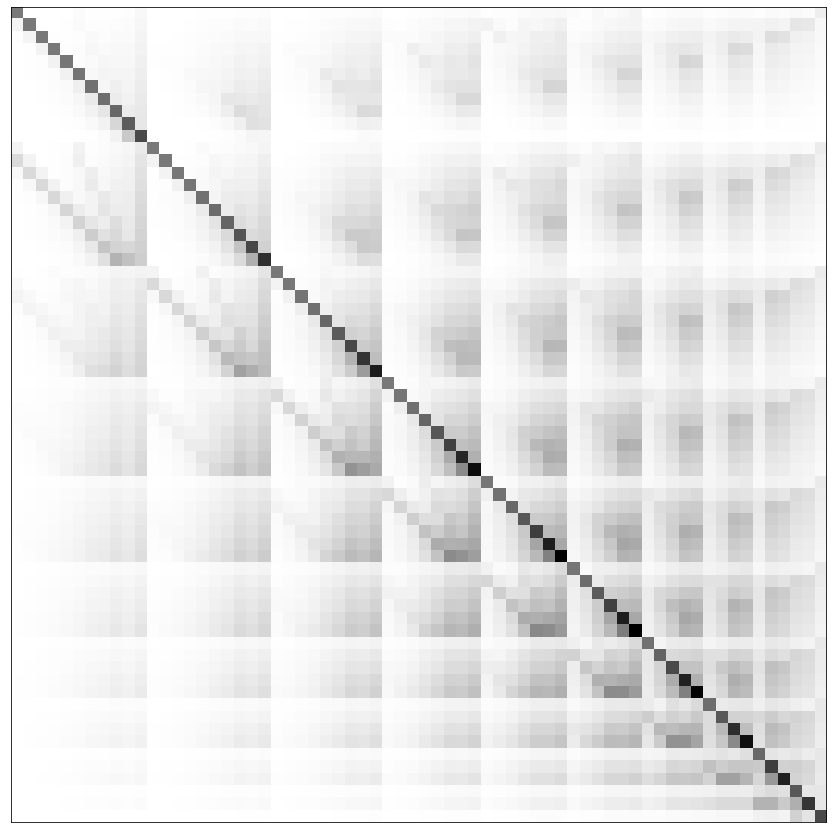

In [12]:
figure(figsize=(15,15))

plt.xticks([])
plt.yticks([])
plt.imshow(N, cmap='gray_r')

# Option to save the output as an image
#plt.savefig('N.png')

We index the values of vector t with their corresponding starting states in a Pandas DataFrame and sort it in descending order.

In [13]:
steps = pd.DataFrame({'Starting State': trans_states, 'Expected # of Steps': t.reshape(-1,)})
steps = steps.sort_values(by=['Expected # of Steps'], ascending = False)

We display the expected number of cycles as a function of the starting state.

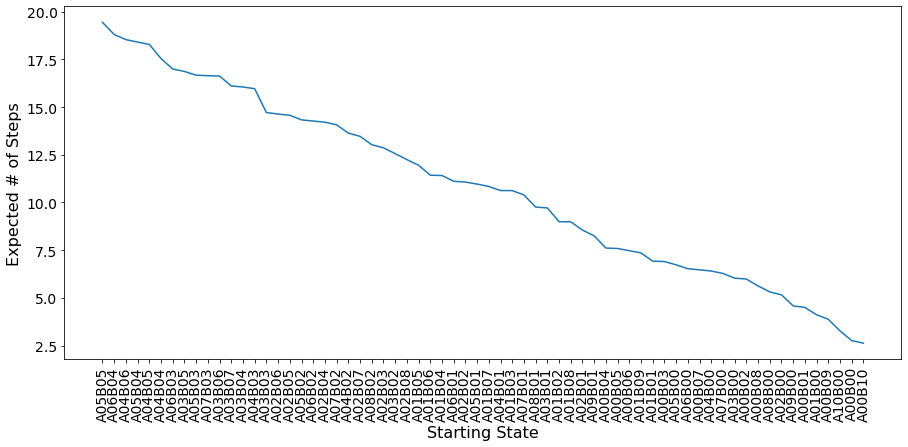

In [14]:
figure(figsize=(15,7))

x = np.arange(len(steps))
x_vals = [states[num_abs:][i] for i in steps.index]
plt.xticks(x, x_vals, rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Starting State', fontsize=16)
plt.ylabel('Expected # of Steps', fontsize=16)
plt.plot(x, steps['Expected # of Steps'])
plt.gcf().subplots_adjust(bottom = 0.18)

# Option to save the output as an image
#plt.savefig('expected_steps_graph.png')

Finally, we display the 10 states with longest expected cycle length.

In [15]:
steps = steps[:10]
print(steps)

# Option to save the output as an image
#dfi.export(steps,"expected_steps.png")

   Starting State  Expected # of Steps
50         A05B05            19.440182
55         A06B04            18.807237
44         A04B06            18.537172
49         A05B04            18.409492
43         A04B05            18.286613
42         A04B04            17.540922
54         A06B03            16.997768
35         A03B05            16.869764
48         A05B03            16.670889
59         A07B03            16.647590
